In [2]:
from scipy import stats

# Expected values

## Mean

The mean is a characterization of its center.

Population mean:
* The expected value or mean of a random variable is the center of its distribution.
* $E[X] = \mu= \sum_i{x_i p(x_i)}$
* $E[X]$ represents the center of mass of a collection of locations and weights, $(x_i,p(x_i))$

Sample mean:
* The center of mass of the data is the empirical mean
* $\bar{x} =\sum_i{x_i p(x_i)}$ where $p(x_i)=1/n$
* The expected value of the sample mean is exactly the population mean that it's trying to estimate.
* The distribution of the sample mean, the population distribution of the sample mean, is centered in the same place
as the original population that the data is drawn from.
* The sample mean is unbiased (unbiased estimator) because its distribution is centered at what it’s trying to estimate.
* The more data goes into the sample mean, the more concentrated its density/mass function is around the population mean.


## Variance & Standard Deviation

Variance & Standard Deviation are measures of variation or spread.

### Variance:
* Is the expected value of the squared deviation of a random variable from its mean.
* Population: $\sigma^2=Var(X)=E[(X-\mu)^2]=\frac{1}{N}(X-\mu)^2$
* Sample: $S^2=\frac{1}{n-1}(X-\bar{x})^2$
 * It is also a random variable with an associated population distribution.
 * Its expected value is the population variance.
 * From wikipedia: "unbiased estimator for the variance is given by applying Bessel's correction, using N − 1 instead of N to yield the unbiased sample variance, denoted $S^2$"

### Standard deviation:
* Square root of the variance
 * Notation: $\sigma$ (population std. deviation) and S (sample std. deviation)
* This measure has the same units as the population
* Standard deviation of a statistic is called a standard error


### IMPORTANT NOTES
<b>
* Our sample expected values for the sample mean and variance will estimate the population mean and variance respectively.
* The average of a random variable is itself a random variable and its associated distribution has  an expected value.
* The center of mass of this distribution is the same as that of the original distribution.
</b>

## Relation between sample and population statistics

Relation between sample and population means:
* $E[\hat{x}]=\mu$
* Sample means (means of random samples) estimate the population mean (their distribution is centered around it).
* Gets more concentrated around its center with larger sample sizes
* Variance of the sample mean is $\sigma^2/n$
 * Estimate of the variance of sample mean is $S^2/n$
 * Estimate of the standard error is $S/n$

Sample variance $S^2$ estimates the population variance $\sigma^2$:
* has a distribution centered around it
* gets more concentrated around its center with larger sample sizes

## Example 1: distribution, mean and variance for different sample sizes

Population theoric mean=0.0 std=1
Sample_size=10 sample_mean=-0.39539302120641573 sample_std=0.8222427955484559
Sample_size=50 sample_mean=-0.12611183954516494 sample_std=0.7735137906595023
Sample_size=200 sample_mean=0.037352398494898444 sample_std=0.9079432372198553
Sample_size=1000 sample_mean=0.03331248452342979 sample_std=1.0353868670338082


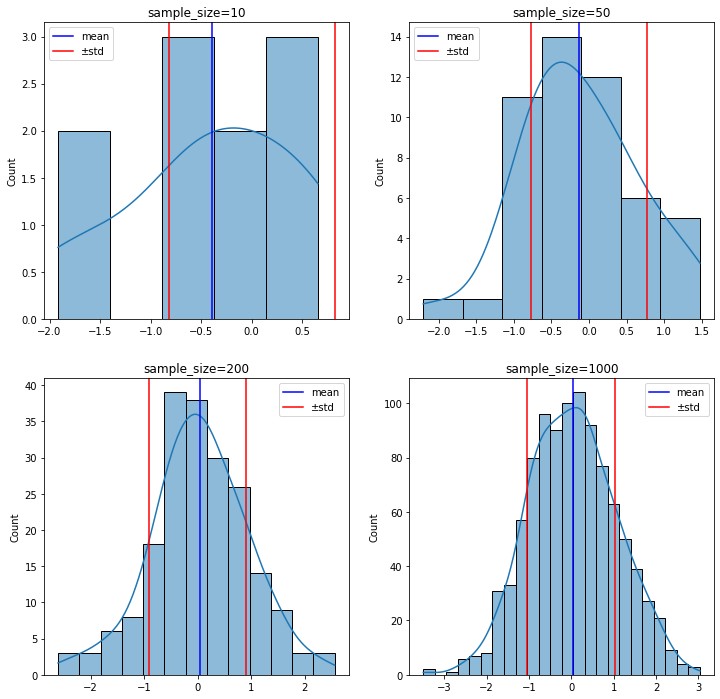

In [32]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sample_sizes = [10, 50, 200, 1000]
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,12))
axs = [ax1,ax2,ax3,ax4]

print('Population theoric mean=0.0 std=1')

for sample_size,ax in zip(sample_sizes, axs):
    x = [np.random.normal() for _ in range(sample_size)]
    sns.histplot(x, kde=True, ax=ax)
    mean = np.mean(x)
    std = np.std(x)
    ax.axvline(mean, color='blue', label='mean')
    ax.axvline(std, color='red', label='±std')
    ax.axvline(-std, color='red')
    ax.set_title(f'sample_size={sample_size}')
    ax.legend()
    print(f'Sample_size={sample_size} sample_mean={mean} sample_std={std}')

## Example 2: Distribution os sample means ans sample variances

Text(0.5, 1.0, 'Mean of sample std.devs')

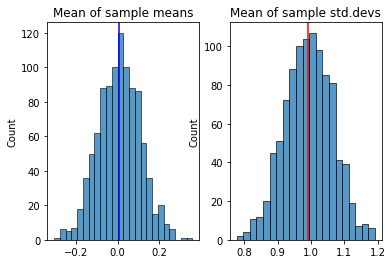

In [34]:
means = []
std_devs = []
n_samples = 1000
sample_size = 100

for _ in range(n_samples):
    x = [np.random.normal() for _ in range(sample_size)]
    means.append(np.mean(x))
    std_devs.append(np.std(x))

f, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(means, ax=ax1)
ax1.axvline(np.mean(means), color='blue')
ax1.set_title('Mean of sample means')

sns.histplot(std_devs, ax=ax2)
ax2.axvline(np.mean(std_devs), color='red')
ax2.set_title('Mean of sample std.devs')

# Normality tests

* Shapiro-Wilk normality test: shapiro
 * Null hypothesis that the data was drawn from a normal distribution
* Kolmogorov-Smirnov test for goodness of fit: kstest(rvs, cdf)
 * Null hypothesis, the two distributions are identical.
 * cdf: If a string, it should be the name of a distribution in `scipy.stats`, which will be used as the cdf function.
 * Use cdf='norm'
* Anderson-Darling test for data coming from a particular distribution: anderson(x, dist='norm')
 * "Critical values provided are for the following significance levels:
    normal/exponenential
      15%, 10%, 5%, 2.5%, 1%"
 * "If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected."
* Other:
 * Jarque-Bera (scipy.stats.jarque_bera)
   * tests whether the sample data has the skewness and kurtosis matching a normal distribution.
   * only use with large number of samples (>2000)
 * Quantile-Quantile Plot (Q-Q Plot)
   * Relation between theoretical (if normally distributed) and actual quantiles
   * If data comes from a normal distribution should approximately present as straight line

Let's assume that if the p-value > 0.05, then we fail to reject the null hypothesis and we assume the distribution of our variable is normal/gaussian.

## Examples of normality tests

In [3]:
import random
x_random = [random.random() for _ in range(0,100)]
x_norm = [random.normalvariate(0,1) for _ in range(0,100)]

print("*** Results for random data ***")
shapiro = stats.shapiro(x_random)
ks = stats.kstest(x_random, cdf='norm')
anderson = stats.anderson(x_random, dist='norm')
print(f'Shapiro: {shapiro}\nKolmogorov-Smirnov: {ks}\nAnderson: {anderson}\n')
print(f'Shapiro p-value: {shapiro.pvalue} (>.05 {shapiro.pvalue>.05}!)\nKolmogorov-Smirnov p-value: {ks.pvalue} (>.05 {ks.pvalue>.05}!)\nAnderson result for 5%: {anderson.statistic<anderson.critical_values[2]}')

print("\n*** Results for normal data ***")
shapiro = stats.shapiro(x_norm)
ks = stats.kstest(x_norm, cdf='norm')
anderson = stats.anderson(x_norm, dist='norm')
print(f'Shapiro: {shapiro}\nKolmogorov-Smirnov: {ks}\nAnderson: {anderson}\n')
print(f'Shapiro p-value: {shapiro.pvalue} (>.05 {shapiro.pvalue>.05}!)\nKolmogorov-Smirnov p-value: {ks.pvalue} (>.05 {ks.pvalue>.05}!)\nAnderson result for 5%: {anderson.statistic<anderson.critical_values[2]}')


*** Results for random data ***
Shapiro: ShapiroResult(statistic=0.9602994322776794, pvalue=0.004224048927426338)
Kolmogorov-Smirnov: KstestResult(statistic=0.5039683727062023, pvalue=4.8802380279625835e-24)
Anderson: AndersonResult(statistic=0.8993618373837933, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shapiro p-value: 0.004224048927426338 (>.05 False!)
Kolmogorov-Smirnov p-value: 4.8802380279625835e-24 (>.05 False!)
Anderson result for 5%: False

*** Results for normal data ***
Shapiro: ShapiroResult(statistic=0.9927999377250671, pvalue=0.8756995797157288)
Kolmogorov-Smirnov: KstestResult(statistic=0.05573783021396547, pvalue=0.8979525207172441)
Anderson: AndersonResult(statistic=0.22668173262067626, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Shapiro p-value: 0.8756995797157288 (>.05 True!)
Kolmogorov-Smirnov p-value: 0.8979525207172

One difference between them:

In [4]:
x_norm0 = [random.normalvariate(0,1) for _ in range(0,100)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,100)]

shapiro0 = stats.shapiro(x_norm0)
ks0 = stats.kstest(x_norm0, cdf='norm')
anderson0 = stats.anderson(x_norm0, dist='norm')

shapiro1 = stats.shapiro(x_norm1)
ks1 = stats.kstest(x_norm1, cdf='norm')
anderson1 = stats.anderson(x_norm1, dist='norm')

print('Results at 5% for data sampled from N(0,1) vs N(1,1)\n*******************************************************')
print(f'Shapiro: {shapiro0.pvalue>.05} vs {shapiro1.pvalue>.05}')
print(f'Kolmogorov-Smirnov: {ks0.pvalue>.05} vs {ks1.pvalue>.05}')
print(f'Anderson: {anderson0.statistic<anderson.critical_values[2]} vs {anderson1.statistic<anderson.critical_values[2]}')

Results at 5% for data sampled from N(0,1) vs N(1,1)
*******************************************************
Shapiro: True vs True
Kolmogorov-Smirnov: True vs False
Anderson: True vs True


## Examples of Q-Q Plot

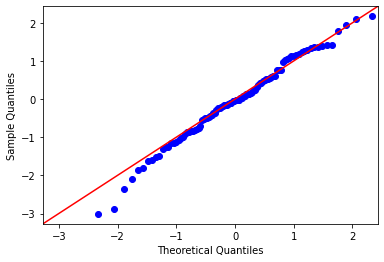

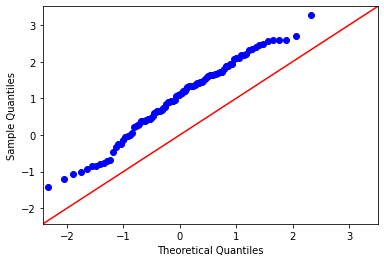

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm

sm.qqplot(np.array(x_norm0), line='45')
plt.show()
sm.qqplot(np.array(x_norm1), line='45')
plt.show()

# Equal Variance Tests
* All assume "null hypothesis that all input samples are from populations with equal variances."
* Levene: scipy.stats.levene(...)
 * "is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality"
* Bartlett: scipy.stats.bartlett(...)
* Fligner-Killeen: scipy.stats.fligner(...)

## Example Equal Variance Tests
Let's assume that if the p-value > 0.05, then we fail to reject the null hypothesis and we assume the samples have the same variance.

In [6]:
x_norm0 = [random.normalvariate(0,1) for _ in range(0,100)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,100)]
x_norm2 = [random.normalvariate(2,1) for _ in range(0,100)]

#different variance
x_norm3 = [random.normalvariate(0,6) for _ in range(0,100)]

levene = stats.levene(x_norm0, x_norm1, x_norm2)
bartlett = stats.bartlett(x_norm0, x_norm1, x_norm2)
fligner = stats.fligner(x_norm0, x_norm1, x_norm2)

levene2 = stats.levene(x_norm0, x_norm3)
bartlett2 = stats.bartlett(x_norm0, x_norm3)
fligner2 = stats.fligner(x_norm0, x_norm3)


print(f'Results for equal variance samples\n{levene}\n{bartlett}\n{fligner}\n')
print(f'Results for different variance samples\n{levene2}\n{bartlett2}\n{fligner2}')

Results for equal variance samples
LeveneResult(statistic=2.466543362535092, pvalue=0.08661492772234514)
BartlettResult(statistic=6.568675557111975, pvalue=0.037465387263090504)
FlignerResult(statistic=5.374481320479582, pvalue=0.06806850460582484)

Results for different variance samples
LeveneResult(statistic=151.4113462647672, pvalue=3.245964392287185e-26)
BartlettResult(statistic=231.03838113076634, pvalue=3.539086252072187e-52)
FlignerResult(statistic=96.56101053101864, pvalue=8.653572198612975e-23)


# ANOVA (ANalysis Of Variance)

ANOVA assumes:
* Samples are from normal distributions
 * Here can be checked also with "residuals are normally distributed"
* Populations with same variance
* Independent samples

We have:
* The null hypothesis for the test is that the means of all samples are equal.
 * Alternative is at least one mean is different.
* Independent variables are categorical and also known as factors
 * Groups or levels identify multiple samples with the same value for the factor.
* ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other.
 * You can do this using a post hoc test like Tukey’s Honest Significant Difference (Tukey's HSD)
   * compares all possible pairs of group means

There are two kinds:
* One-way: 1 independent variable.
* Two-way: two independent variables.
 * With replication or without replication.
 * Takes into account variation at row level (if we see one-way as column variation)

Test results will include:
 * $F = \frac{between\ group\ variation}{within\ group\ variation}$
 * Larger F ratios indicate higher probability than the groups have different means
 * p-value: if ANOVA's p-value is less than let's say 0.05 (we should choose this value, though 0.05 is typical) we have sufficient
evidence to say that the means across each group are not equal (reject the null hypothesis that the means are the same).

In python:
* ANOVA:
 * one-way ANOVA: scipy.stats.f_oneway
 * statsmodels.stats.anova.anova_lm : "Anova table for one or more fitted linear models"
  * statsmodels.formula.api.ols: Ordinary Least Squares.
    * model = ols(formula,df).fit()
    * model.summary()
  * ANOVA type:
    * I:
    * II:
    * III:
* Tukey's HSD: statsmodels.stats.multicomp.pairwise_tukeyhsd(endog, groups, alpha=0.05)
 * endog: response variable
 * groups: array with groups
 * alpha: significance level for the test
 * Assumptions:
   * observations are independent
   * groups are normally distributed
   * homogeneity of within-group variance across the groups

## R-like formulas, general form:
* dependent-variable ~ independent_variables_formula

Formula operators:
* "C(variable)": treat variable as categorical.
* "+": adds columns
* ":": adds new column with the product of two
* "*": adds new column with the product of two and includes individual columns
* "-": removes columns ("-1" to remove incercept)
* You can apply vectorized functions to the variables in your model "func(column)"


## Ordinary Least Squares for Linear Regression

Looking for the parameters of vector $b$ to fit the formula $y_i = x_i^T \beta_i + \epsilon_i$, where:
* Usually $x_{i,1} = 1$ and $\beta_1$ is called the intercept.
* $\epsilon_i$ represents unobserved random variables (called residuals or errors).

Principle of least squares:
"minimizing the sum of the squares of the differences between the observed
dependent variable (values of the variable being observed) in the given dataset
and those predicted by the linear function."
source: https://en.wikipedia.org/wiki/Ordinary_least_squares



## Example 1: One-way ANOVA with scipy.stats.f_oneway


In [7]:
from scipy.stats import f_oneway

x_norm0 = [random.normalvariate(0,1) for _ in range(0,200)]
x_norm1 = [random.normalvariate(1,1) for _ in range(0,200)]
x_norm2 = [random.normalvariate(2,1) for _ in range(0,200)]

shapiro0 = stats.shapiro(x_norm0)
shapiro1 = stats.shapiro(x_norm1)
shapiro2 = stats.shapiro(x_norm2)
levene = stats.levene(x_norm0, x_norm1, x_norm2)

print("\n".join(map(str,[shapiro0, shapiro1, shapiro2, levene])))

anova = f_oneway(x_norm0, x_norm1, x_norm2)

print(anova)
print(f'Different Means? {anova.pvalue<0.05}')

ShapiroResult(statistic=0.9930810332298279, pvalue=0.470928430557251)
ShapiroResult(statistic=0.9930911064147949, pvalue=0.472260445356369)
ShapiroResult(statistic=0.9914703369140625, pvalue=0.289628803730011)
LeveneResult(statistic=1.033892126606288, pvalue=0.3562559866505102)
F_onewayResult(statistic=216.5149444325044, pvalue=1.9618440317963034e-71)
Different Means? True


## Example 2: ANOVA

The resulting ANOVA table for a single model has columns:
* sum_sq : Sum of squares for model terms.
* df : Degrees of freedom for model terms.
* F : F statistic value for significance of adding model terms.
* PR(>F) : P-value for significance of adding model terms.

In [8]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn import datasets
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import numpy as np

iris = datasets.load_iris()
column_names = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']
df = DataFrame(data=iris.data, columns=column_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

aux = df.groupby([df['species']])
for c in column_names:
    print("\n****** Shapiro test",c)
    aux_df = aux[c].apply(lambda x: pd.Series(stats.shapiro(x), index=["statistic","p-value"]))
    print(aux_df)
    print("\n***** ",
          stats.levene(
              df[df['species']=='setosa'][c],
              df[df['species']=='versicolor'][c],
              df[df['species']=='virginica'][c]))



****** Shapiro test sepal_l
species              
setosa      statistic    0.977699
            p-value      0.459528
versicolor  statistic    0.977836
            p-value      0.464733
virginica   statistic    0.971180
            p-value      0.258325
Name: sepal_l, dtype: float64

*****  LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

****** Shapiro test sepal_w
species              
setosa      statistic    0.971720
            p-value      0.271526
versicolor  statistic    0.974133
            p-value      0.337989
virginica   statistic    0.967391
            p-value      0.180904
Name: sepal_w, dtype: float64

*****  LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

****** Shapiro test petal_l
species              
setosa      statistic    0.954977
            p-value      0.054810
versicolor  statistic    0.966005
            p-value      0.158483
virginica   statistic    0.962186
            p-value      0.109774
Name: petal_l, dty

Test results show:
* petal_l doesn't pass the Levene test
* petal_w fails both Shapiro and Levene tests

***** Some OLS internals *****

OLF summary
                             OLS Regression Results                            
Dep. Variable:                sepal_l   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.67e-31
Time:                        12:11:20   Log-Likelihood:                -111.73
No. Observations:                 150   AIC:                             229.5
Df Residuals:                     147   BIC:                             238.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

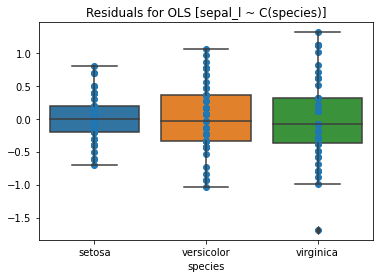

In [34]:
import seaborn as sns

formula = "sepal_l ~ C(species)"
model = ols(formula, df).fit()
print("***** Some OLS internals *****\n")
print("OLF summary\n", model.summary())
print("OLF influente summary\n", model.get_influence().summary_frame())
print("OLF residuals\n", model.resid)

plt.scatter(df['species'], model.resid.array)
sns.boxplot(x=df['species'], y=model.resid)
plt.title("Residuals for OLS ["+formula+"]")
plt.show()

Here we see the normaly distributed residuals for sepal_l.

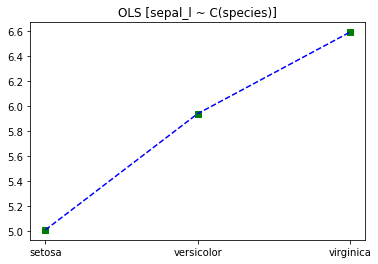

OLS predictions for data [sepal_l ~ C(species)]
[5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006 5.006
 5.006 5.006 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936 5.936
 5.936 5.936 5.936 5.936 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588 6.588
 6.588 6.588 6.588 6.588 6.588 6.588]


In [35]:
x = DataFrame(data=[['setosa'],['versicolor'],['virginica']], columns=['species'])
y = model.predict(x)
f, ax = plt.subplots()
plt.scatter(x['species'],y, color="g", marker="s")
plt.plot(y, 'b--')
plt.title("OLS ["+formula+"]")
#ax.set_xticks([0,1,2])
#ax.set_xticklabels(['setosa','versicolor','virginica'])
plt.show()

print("OLS predictions for data ["+formula+"]")
print(model.predict())

We can see OLS model's predicted values for sepal_l for each class.

In [36]:
aov_table = anova_lm(model, typ=1)

print(f'\n\nAOV for [{formula}]:')
print(aov_table)



AOV for [sepal_l ~ C(species)]:
               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN


The AOV results for "sepal_l ~ C(species)" are significant, see value of PR(>F):
* We reject the null hypothesis that the sepal_l ofr each species have the same mean.

## Example 3: ANOVA and Tukey HSD

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

formula1 = "sepal_l ~ C(species)"
formula2 = "sepal_w ~ C(species)"

print("**** ANOVA ****")
for f in [formula1, formula2]:
    model = ols(f, df).fit()
    aov_table = anova_lm(model, typ=1)
    print(f'\nAOV for [{f}]:')
    print(aov_table)

print("\n**** Tukey ****\n")
tukey1 = pairwise_tukeyhsd(endog=df['sepal_l'], groups=df['species'])
tukey2 = pairwise_tukeyhsd(endog=df['sepal_w'], groups=df['species'])

print("sepal_length\n", tukey1,"\n")
print("sepal_width\n", tukey2,"\n")

**** ANOVA ****

AOV for [sepal_l ~ C(species)]:
               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN

AOV for [sepal_w ~ C(species)]:
               df     sum_sq   mean_sq         F        PR(>F)
C(species)    2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual    147.0  16.962000  0.115388       NaN           NaN

**** Tukey ****

sepal_length
    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     0.93 0.001 0.6862 1.1738   True
    setosa  virginica    1.582 0.001 1.3382 1.8258   True
versicolor  virginica    0.652 0.001 0.4082 0.8958   True
--------------------------------------------------------- 

sepal_width
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     grou

Here we see ANOVA and Tukey HSD results for:
* sepal_l ~ C(species)
* sepal_w ~ C(species)

In both cases results are significant and we can see the confidence intervals for the mean differences between groups.